# Classification Lab
## Support Vector Machine

In this practice we will have two tasks: 
* Experiment with linear support vector machine
* Classify images in CIFAR10 dataset with KNN classifer and SVM 

Let's start!

# Warm up

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


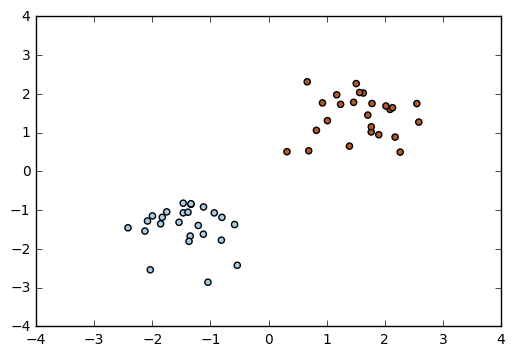

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from skimage.feature import hog

# Let's generate some 2D data
n_samples = 50
n_features = 2
centers = np.array([[-1.5, -1.5], [1.5, 1.5]])
random_state = 0
cluster_std = 0.5
X, Y = make_blobs(n_samples, n_features, centers, cluster_std, random_state)

# plot the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.axis('tight')
plt.axis([-4, 4, -4, 4])
plt.show()

In [3]:
# Now, let's fit a linear SVM to the data
# This week we use the LinearSVC function from sklearn. You will implement your own Linear SVM in the next week.
clf = SVC(C=1,kernel='linear')
clf.fit(X, Y)
w = clf.coef_
b = clf.intercept_
print 'w: ', w
print 'b: ', b

w:  [[ 0.63425831  0.76404514]]
b:  [ 0.40986681]


# Task 1: Understand linear SVM
## We will do a list of interesting experiments with the above linear SVM classifier

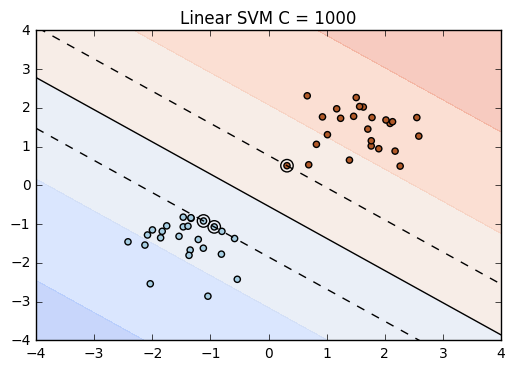

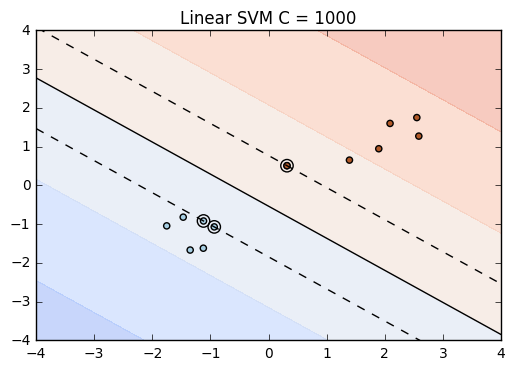

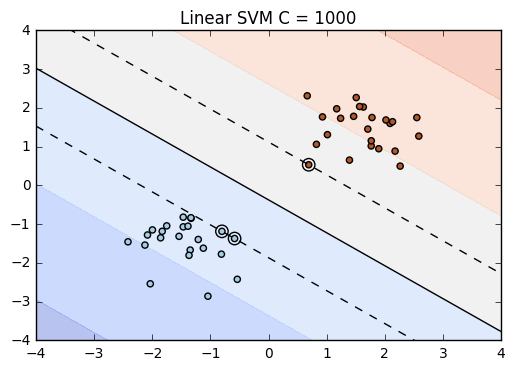

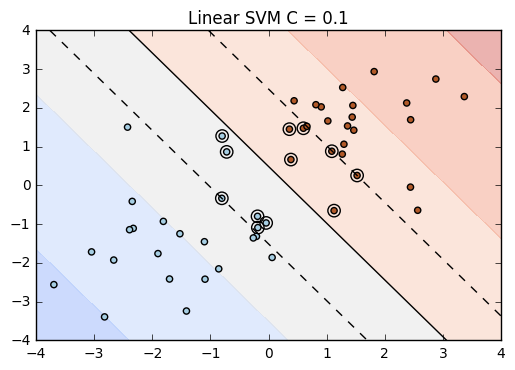

In [4]:
# Let's first visualize the results
levels = [-1.0, 0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
# the contourf function plot the "height map" of the classification score
def prep_plot(X, Y, C=1000, title = 'Linear SVM'):
    clf = SVC(C=C,kernel='linear')
    clf.fit(X, Y)
    w = clf.coef_
    b = clf.intercept_
    
    xx, yy = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    zz = np.dot(np.c_[xx.ravel(), yy.ravel()], w.T) + b # This is how we compute the classification score
    zz = zz.reshape(xx.shape)
    
    plt.clf()
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha = 0.4) # this is a color map that renders the classification score
    plt.contour(xx, yy, zz, levels, colors=colors, linestyles = linestyles) # These are the gutters of the street


    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80 ,facecolors='none')
    plt.axis('tight')
    plt.axis([-4, 4, -4, 4])
    plt.title(title + ' C = {}'.format(C))
    
    
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.show()

prep_plot(X, Y)


################################################################################
# TODO: Implement Match_L2(test, train)                                        #
################################################################################
# Experiment 1:
# Find the support vectors in X, and plot them in the figure 
# Hint: 
# 1) in practice, the support vectors may not exactly land on the gutters of the street.
# You can use a small epsilon to count for such discrepancy.  
# 2) You can use plt.scatter to plot the support vectors. For example, plt.scatter(SV[:, 0], SV[:, 1], s=80, facecolors='none'))
# Question 1: What is the functional margin for this model? What is the geometric margin?
# Question 2: Let's multiply w by 2. What is the new functional margin and geometric margin? 
#             And what is the new geometric margin between the line wx + b = 1 and wx + b = -1? 

# Experiment 2:
# Remove some non-support vectors from X and re-train the SVM, see if the model changes
Z = np.array(clf.support_vectors_)

svs = clf.support_vectors_
Y1 = []
for sv in svs:
    y = 0
    for i in range(X.shape[0]):
        k = np.abs(sv - X[i])
        if k[0] < 10**-5 and k[1] < 10**-5:
            y = Y[i]
    Y1.append(y)

for i in range(10) :
    x = X[i].reshape((2,1))
    Z = np.append(Z,[X[i]], axis=0)
    Y1.append(Y[i])
    
prep_plot(Z, Y1)
    
# Experiment 3:
# Let's get back the full training set X. 
# This time, remove the support vectors from X and see if the result changes
X_no_sup = []
Y2 = []
for idx, x in enumerate(X):
    add = True
    for sup in clf.support_vectors_:
        k = np.abs(x - sup)
        if k[0]  < 10**-5 and k[1] < 10**-5:
            add = False
    
    if add:
        X_no_sup.append(x)
        Y2.append(Y[idx])
        
Z = np.array(X_no_sup)
prep_plot(Z, Y2)
# Experiment 4: Soft Margin
# Let's get back the full training set X. 
# The parameter C in the above line "clf = LinearSVC(C=1000)" controls how strict the SVM is
# See how the result change with larger/smaller C


# Let's generate some 2D data
n_samples = 50
n_features = 2
centers = np.array([[-1.5, -1.5], [1.5, 1.5]])
random_state = 0
cluster_std = 1
X4, Y4 = make_blobs(n_samples, n_features, centers, cluster_std, random_state)
prep_plot(X4,Y4,C=10**-1)
# ################################################################################
# #                                 END OF YOUR CODE                             #
# ################################################################################

# Task 2: Classify CIFAR10 with Linear SVM on Pixels

In [5]:
# Let's load our favouriate cifar10 dataset
from sklearn.svm import LinearSVC
from utils.data_utils import load_CIFAR10
cifar10_dir = '../opt/data/datasets/cifar-10-batches-py'
print('Loading CIFAR10 ...')
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
print('Loaded')

# Let's keep only the first 1000 training images and the first 100 testing images for efficiency
# Feel free to test with more images when your code works.
num_training = 10000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]
num_test = 100
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Loading CIFAR10 ...
Loaded
Training data shape:  (10000, 3072)
Training labels shape:  (10000,)
Test data shape:  (100, 3072)
Test labels shape:  (100,)


In [ ]:
################################################################################
# TODO: Train a linear SVM using LinearSVC                                     #
################################################################################
# Step 1: Fit LinearSVC to X_train and y_train, use C = 1
# You should get around 0.22 testing accuracy (1000 training images and 100 testing images)
# It might take some time to train. (About a minute with a 2.5 GHz i7)
clf = SVC(C=1, kernel='linear')
clf.fit(X_train, y_train)

# Step 2: Compute the average accuracy on training and testing images (the percentage of correct classification)
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

# ################################################################################
# #                                 END OF YOUR CODE                             #
# ################################################################################
# Here is a way to visualize the learned weights. 

w = clf.coef_
w = w.reshape(10, 32, 32, 3)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
    plt.subplot(2, 5, i + 1)
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])
plt.show()

# Question: Can you give a very intuitive explaination for these weight images from the perspective of image match?

# Task 3: Classify CIFAR10 With Linear SVM on HOG

In [7]:
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.svm import LinearSVC
from utils.data_utils import load_CIFAR10
def Vector2Image(v):
    return np.reshape(v, (32, 32, 3)).astype('uint8')
cifar10_dir = '../opt/data/datasets/cifar-10-batches-py'
print('Loading CIFAR10 ...')
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
print('Loaded')

# Let's keep only the first 1000 training images and the first 100 testing images for efficiency
num_training = 1000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]
num_test = 100
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Loading CIFAR10 ...
Loaded
Training data shape:  (1000, 3072)
Training labels shape:  (1000,)
Test data shape:  (100, 3072)
Test labels shape:  (100,)


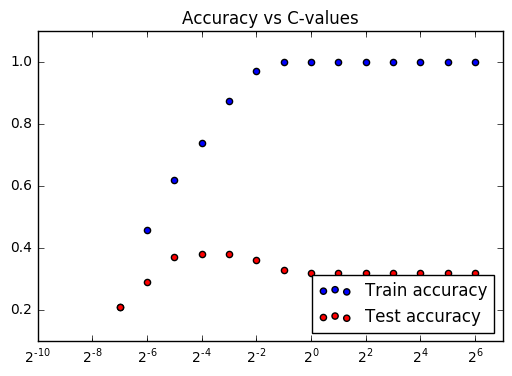

In [8]:
################################################################################
# TODO: Train with HOG features                                                #
################################################################################
# Step 1: Compute HOG features for X_train and X_test
orientations=8
pixels_per_cell=(4, 4)
cells_per_block=(1, 1)
visualise=False

to_hog = lambda img : hog(rgb2gray(Vector2Image(img)), 
                        orientations=orientations, 
                        pixels_per_cell=pixels_per_cell,
                        cells_per_block=cells_per_block, 
                        visualise=visualise)

# Transform images
hog_train = np.array([to_hog(x) for x in X_train])
hog_test = np.array([to_hog(x) for x in X_test])

# Step 2: Train a linear SVM on HOG features, use C = 1
# It should train faster than pixels because the dimension of features is reduced

vals = []

for c in [2**i for i in range(-7, 7, 1)]:
    # Train new clf
    clf = SVC(C=c, kernel='linear')
    clf.fit(hog_train, y_train)
    
    # Measure accuracies
    acc_train = accuracy_score(clf.predict(hog_train), y_train)
    acc_test = accuracy_score(clf.predict(hog_test), y_test)
    
    vals.append((c, acc_train, acc_test))

vals = np.array(vals)
plt.clf()
ax = plt.gca()
plt.scatter(x=vals[:,0], y=vals[:,1],c='b', label='Train accuracy')
plt.scatter(x=vals[:,0], y=vals[:,2],c='r', label='Test accuracy')
ax.set_xscale('log', basex=2)
plt.title('Accuracy vs C-values')
plt.legend(loc="lower right")
plt.show()


# Step 3: Test your classifier on both the training and testing set
# You should get around 0.28 testing accuracy with 1000 traninig image and the 100 testing images
# The testing accuracy should increase to around 0.42 with 20000 training images and 1000 teting images

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################


################################################################################
# TODO: Try different C values for LinearSVC                                    #
################################################################################
# It seems that SVM does not generalize so well when trained with small data 
# (High accuracy on 1000 training images and low accuracy on 100 testing images).

# Let's improve it with better hyper-parameters.
# To do so, try to use different C values for the LinearSVC function.

# Question: How does the training/testing accuracy changes with C?

# Question: what is the optimal C you found?
# Does it make the classifier more/less tolerant to miss-classification in the training data? 
# Can you explain your result?

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Task 4: Classify CIFAR10 With KNN on Pixel
## Now let's see how well does KNN classifier perform.

In [9]:
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.svm import LinearSVC
from utils.data_utils import load_CIFAR10
def Vector2Image(v):
    return np.reshape(v, (32, 32, 3)).astype('uint8')
# With HOG features, the input dimension is reduced from 3072 to 512
# For these reason we can afford to train with more images
cifar10_dir = '../opt/data/datasets/cifar-10-batches-py'
print('Loading CIFAR10 ...')
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
print('Loaded')
print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

# Let's keep only the first 1000 training images and the first 100 testing images for efficiency
num_training = 1000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]
num_test = 100
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

orientations=8
pixels_per_cell=(4, 4)
cells_per_block=(1, 1)
visualise=False
temp = hog(rgb2gray(Vector2Image(X_train[0])), orientations, pixels_per_cell,
                               cells_per_block, visualise)
temp = np.reshape(temp, (1, temp.shape[0]))

hog_train = np.zeros((X_train.shape[0], temp.shape[1]))
print "computing HOG features for training images ..."
for i in range(hog_train.shape[0]):
    hog_train[i, :] = hog(rgb2gray(Vector2Image(X_train[i, :])), orientations, pixels_per_cell,
                               cells_per_block, visualise)
print "finished"
hog_test = np.zeros((X_test.shape[0], temp.shape[1]))
print "computing HOG features for training images ..."
for i in range(hog_test.shape[0]):
    hog_test[i, :] = hog(rgb2gray(Vector2Image(X_test[i, :])), orientations, pixels_per_cell,
                               cells_per_block, visualise)
print "finished"

Loading CIFAR10 ...
Loaded
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
computing HOG features for training images ...
finished
computing HOG features for training images ...
finished


In [10]:
from collections import Counter
################################################################################
# TODO: Train a KNN classifier with Pixels                                     #
################################################################################
# You can build a KNN classifier based on the image match code you had done in the previous assignment
from sklearn.neighbors import KNeighborsClassifier
# Step 1: compute a distance matrices between X_test and X_train 
# Check the solution from last week for the VECTORIZED implementation for MULTIPLE testing images (Method 2).
from sklearn.metrics.pairwise import pairwise_distances

dists = pairwise_distances(X=X_train, Y=X_test)

# Step 2: find the most frequent class in the top K = 5 neighbours for each testing image. 
# Hint, you can use the most_common function of the Counter class to return the most common class
# https://docs.python.org/2/library/collections.html#collections.Counter
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

acc = accuracy_score(y_preds, y_test)
print(acc)

# Compute the testing accuracy of your classifier
# You should get around 0.30 testing accuracy with k=5, 1000 traninig image, and 100 testing images

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

0.24


# Task 5: Classify CIFAR10 With KNN on HOG

In [11]:
from collections import Counter
################################################################################
# TODO: Train a KNN classifier with HOG features                               #
################################################################################
# You should get around 0.33 testing accuracy with k=5, 1000 traninig image, and 100 testing images
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(hog_train, y_train)
y_preds = knn.predict(hog_test)
acc = accuracy_score(y_preds, y_test)
print(acc)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

0.25
